<a href="https://colab.research.google.com/github/sejallotliker/Advanced_python/blob/main/Fertilizer_data_ML_practice.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#Problem statement: Data consists of only 3 columns

1. Crop density
2. Fertilizer types
3. Crop yield


#Find a ML algorithm to predict the crop yield, given crop density and fertilizer type.

Importing the libraries

In [65]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt


In [66]:
#import data:
df = pd.read_csv('/content/drive/MyDrive/JNCASR/Sem-4/Intro_to_ML/My_practice_ML/crops.csv')

df.head()

,crop_density,fertilizer_types,crop_yield
0,low,standard,177.228692
1,high,standard,177.550041
2,low,standard,176.408462
3,high,standard,177.703625
4,low,standard,177.125486


In [67]:
#data analysis

df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 96 entries, 0 to 95
Data columns (total 3 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   crop_density      96 non-null     object 
 1   fertilizer_types  96 non-null     object 
 2   crop_yield        96 non-null     float64
dtypes: float64(1), object(2)
memory usage: 2.4+ KB


In [68]:
df.isnull().sum()

,0
crop_density,0
fertilizer_types,0
crop_yield,0


There are no null values in the data

In [69]:
df['fertilizer_types'].unique()

array(['standard', 'organic', 'synthetic'], dtype=object)

In [70]:
df['crop_density'].unique()

array(['low', 'high'], dtype=object)

<Axes: >

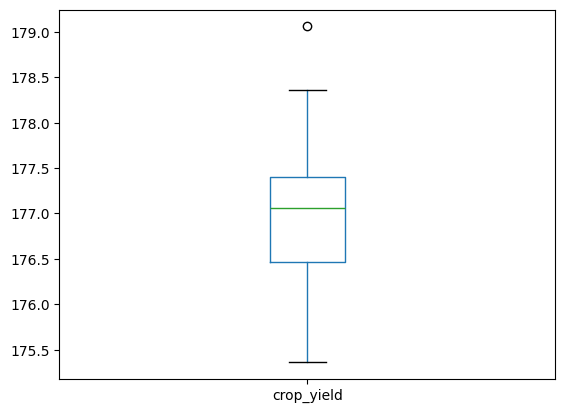

In [71]:
import matplotlib.pyplot as plt
df.boxplot(column =['crop_yield'], grid = False)


In [72]:
#To convert categorical data into numerical:
from sklearn.preprocessing import LabelEncoder

le = LabelEncoder()

df['fertilizer_types'] = le.fit_transform(df['fertilizer_types'])

df['crop_density'] = le.fit_transform(df['crop_density'])

df.head()

,crop_density,fertilizer_types,crop_yield
0,1,1,177.228692
1,0,1,177.550041
2,1,1,176.408462
3,0,1,177.703625
4,1,1,177.125486


In [73]:
#To split the data into train and test

from sklearn.model_selection import train_test_split

x = df.drop('crop_yield', axis=1)
y = df['crop_yield']

x_train, x_test, y_train, y_test = train_test_split(x, y, train_size = 0.8, random_state = 42)


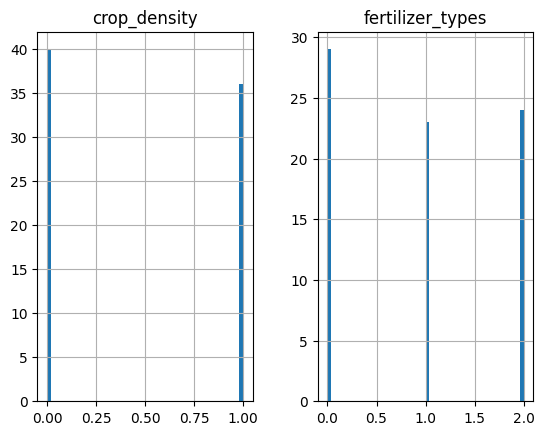

In [74]:
#Feature scaling:
x_train.hist(bins = 50)
plt.show()

In [75]:
from sklearn.preprocessing import MinMaxScaler
minmax_scaler = MinMaxScaler(feature_range=(-1,1))

x_train = minmax_scaler.fit_transform(x_train)
x_test = minmax_scaler.transform(x_test)

#To build a ML model:

In [76]:
#Linear regression:
from sklearn.linear_model import LinearRegression

model = LinearRegression()
model.fit(x_train, y_train)

LinearRegression()

In [77]:
model.rank_, model.coef_, model.intercept_

(2, array([-0.20295411,  0.15870559]), np.float64(177.01620826570166))

###To evaluate the model:

In [78]:
from sklearn.metrics import r2_score, root_mean_squared_error

y_pred = model.predict(x_test)
r2 = r2_score(y_test, y_pred)
print("R2 score: ", r2)

rmse_score = root_mean_squared_error(y_test, y_pred)
print ("RMSE: ", rmse_score)


R2 score:  0.20613350604903802
RMSE:  0.8006419331530036


In [79]:
#To see R2 and RMSE for train data:
yhat_train = model.predict(x_train)
r2 = r2_score(y_train, yhat_train)
print("R2 score: ", r2)

rmse_score = root_mean_squared_error(y_train, yhat_train)
print ("RMSE: ", rmse_score)



R2 score:  0.17055162617891784
RMSE:  0.5306823312273907


In [80]:

a = pd.DataFrame({'Predicted': y_pred, 'Actual': y_test})
a.head()

,Predicted,Actual
80,176.971960,176.300517
77,177.377868,177.168302
73,177.377868,176.925576
94,176.971960,177.687264
33,177.060457,176.044342


In [81]:
#To apply random Forest model
from sklearn.ensemble import RandomForestRegressor

model = RandomForestRegressor()
model.fit(x_train, y_train)

RandomForestRegressor()

In [82]:
y_hat_rf = model.predict(x_test)
yhat_train_rf = model.predict(x_train)
r2 = r2_score(y_test, y_hat_rf)
print("R2 score: ", r2)

rmse_score = root_mean_squared_error(y_test, y_hat_rf)
print ("RMSE: ", rmse_score)

R2 score:  0.0939072686267578
RMSE:  0.8553639041426422


In [83]:
r2 = r2_score(y_train, yhat_train_rf)
print("R2 score: ", r2)

rmse_score = root_mean_squared_error(y_train, yhat_train_rf)
print ("RMSE: ", rmse_score)

R2 score:  0.3355679264517135
RMSE:  0.4749689751686897
